In [1]:
# Nativos
import random as rn
import os
import sys
import gc
import json

#calculo
import numpy as np
import pandas as pd
import scipy as sp

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

subfolder = "data"
os.listdir(subfolder)

['.ipynb_checkpoints',
 'CONTENT_CATEGORY.zip',
 'CONTENT_CATEGORY_BOTTOM.zip',
 'CONTENT_CATEGORY_TOP.zip',
 'conversiones.zip',
 'data.zip',
 'data2.zip',
 'device_data.zip',
 'PAGE.zip',
 'pageviews.zip',
 'pageviews_complemento.zip',
 'pageview_with_previous_2.csv',
 'sampleSubmission.zip',
 'SITE_ID.zip']

In [2]:
pageview = pd.read_csv('pageview_trimestral.csv')
print(pageview.shape)

pageview.head()

(44924, 4079)


,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_2,none_202,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,5,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
with open('convertions.json', 'r') as outfile_names:
    dict_conversion = json.load(outfile_names)

len(dict_conversion)

4

In [4]:
for trim in pageview['trimestre'].unique():
    print(trim, len(dict_conversion[str(trim)]))

1 246
2 374
3 392
4 391


In [5]:
for trim in pageview['trimestre'].unique():
    print(
        trim, 
        len(dict_conversion.get(str(trim + 1), []))
    )

1 374
2 392
3 391
4 0


In [6]:
pageview['hizo_conversion_este_mes'] = pageview[['trimestre', 'USER_ID']].apply(
    lambda _: _[1] in dict_conversion.get(str(_[0]), []), axis=1
).astype(int)

pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_202,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pageview['convertion'] = pageview[['trimestre', 'USER_ID']].apply(
    lambda _: _[1] in dict_conversion.get(str(_[0] + 1), []), axis=1
).astype(int)

pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes,convertion
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.crosstab(
    pageview['hizo_conversion_este_mes'], pageview['convertion']
)

convertion,0,1
hizo_conversion_este_mes,,
0,42619,902
1,1163,240


In [9]:
pageview.tail()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,none_203,none_268,none_369,none_40,none_45,none_5,none_85,none_9,hizo_conversion_este_mes,convertion
44919,4,11665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44920,4,11670,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44921,4,11671,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44922,4,11673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44923,4,11675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pageview.dtypes.head(2)

trimestre    int64
USER_ID      int64
dtype: object

### SPEED

In [11]:
spped = pd.read_csv('speed_trimestral.csv')
print(spped.shape)

spped.head()

(44893, 6)


,trimestre,USER_ID,speed_0,speed_1,speed_2,speed_3
0,4,0,2,49,0,61
1,4,1,38,15,6,0
2,4,2,0,46,12,16
3,4,3,0,55,2,0
4,4,4,0,40,8,0


In [12]:
print(pageview.shape)
pageview = pageview.merge(spped, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4081)
(44924, 4085)


In [13]:
del spped

### DEVICE

In [14]:
device = pd.read_csv('device_trimestral.csv')
print(device.shape)

device.head()

(44893, 4)


,trimestre,USER_ID,device_0,device_1
0,4,0,0,112
1,4,1,9,50
2,4,2,19,55
3,4,3,5,52
4,4,4,46,2


In [15]:
print(pageview.shape)
pageview = pageview.merge(device, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4085)
(44924, 4087)


In [16]:
del device

### SITE_ID

In [17]:
site_id = pd.read_csv('site_id_trimestral.csv')
print(site_id.shape)

site_id.head()

(44924, 6)


,trimestre,USER_ID,1,2,3,4
0,1,0,121,1547,173,0
1,1,1,82,483,58,0
2,1,2,103,196,120,0
3,1,3,46,284,16,0
4,1,4,57,820,388,16


In [18]:
print(pageview.shape)
pageview = pageview.merge(site_id, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4087)
(44924, 4091)


In [19]:
del site_id

### SCHEDULE

In [20]:
schedule = pd.read_csv('schedule_trimestral.csv')
print(schedule.shape)

schedule.head()

(44924, 44)


,trimestre,USER_ID,0_almuerzo,0_antes_del_trabajo,0_luego_del_trabajo,0_madrugada,0_trabajo_manana,0_trabajo_tarde,1_almuerzo,1_antes_del_trabajo,...,5_luego_del_trabajo,5_madrugada,5_trabajo_manana,5_trabajo_tarde,6_almuerzo,6_antes_del_trabajo,6_luego_del_trabajo,6_madrugada,6_trabajo_manana,6_trabajo_tarde
0,1,0,41,25,58,0,179,17,46,5,...,23,0,28,36,6,0,0,0,12,25
1,1,1,53,0,0,0,38,0,8,0,...,13,0,19,0,11,0,12,0,22,0
2,1,2,93,0,4,0,21,0,31,0,...,0,0,6,0,0,0,0,0,4,0
3,1,3,30,0,2,0,16,32,10,0,...,0,8,4,18,2,0,4,0,11,5
4,1,4,118,40,23,57,41,11,17,11,...,24,7,4,3,0,0,5,22,10,8


In [21]:
print(pageview.shape)
pageview = pageview.merge(schedule, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4091)
(44924, 4133)


In [22]:
del schedule

### RANGO DÍAS

In [23]:
dias = pd.read_csv('rango_dias_trimestral.csv')
print(dias.shape)

dias.head()

(44924, 7)


,trimestre,USER_ID,18_24,7_12,fin_de_mes,inicio_mes,quincena
0,1,0,269,421,264,657,230
1,1,1,124,109,142,144,104
2,1,2,94,147,50,51,77
3,1,3,51,58,65,93,79
4,1,4,215,680,96,199,91


In [24]:
print(pageview.shape)
pageview = pageview.merge(dias, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4133)
(44924, 4138)


In [25]:
del dias

### CATEGORIA DE CONTENIDO

In [26]:
category = pd.read_csv('content_category_trimestral.csv')
print(category.shape)

category.head()

(44924, 46)


,trimestre,USER_ID,10_5,11_4,12_4,13_4,14_5,15_5,16_2,17_2,...,50_5,59_2,5_2,60_2,61_2,63_2,6_4,7_5,8_5,9_4
0,1,0,1,0,0,0,0,0,0,0,...,0,0,10,0,0,0,5,3,1,1
1,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0
2,1,2,1,4,13,8,5,2,0,0,...,0,0,6,0,0,0,4,1,1,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,1
4,1,4,0,0,0,1,0,0,15,7,...,0,0,16,0,0,0,12,7,0,2


In [27]:
print(pageview.shape)
pageview = pageview.merge(category, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4138)
(44924, 4182)


In [28]:
del category

### BUSQUEDA

In [29]:
search = pd.read_csv('search_trimestral.csv')
print(search.shape)

search.head()

(44924, 3)


,trimestre,USER_ID,1
0,1,0,1841
1,1,1,623
2,1,2,419
3,1,3,346
4,1,4,1281


In [30]:
print(pageview.shape)
pageview = pageview.merge(search, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4182)
(44924, 4183)


In [31]:
del search

### PAGINA SOLA

In [32]:
simple = pd.read_csv('pageview_simple_trimestral.csv')
print(simple.shape)

simple.head()

(44924, 798)


,trimestre,USER_ID,page_1,page_10,page_100,page_1000,page_1001,page_1018,page_1019,page_102,...,page_950,page_96,page_963,page_97,page_972,page_98,page_980,page_99,page_994,page_997
0,1,0,107,327,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,78,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,16,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,25,347,3,0,0,0,0,6,...,0,1,0,1,0,1,0,6,0,0


In [33]:
print(pageview.shape)
pageview = pageview.merge(simple, how='left', on=["trimestre", "USER_ID"])
print(pageview.shape)

(44924, 4183)
(44924, 4979)


In [34]:
del simple

In [35]:
nulos = pageview.isnull().sum()
nulos[nulos > 0]

speed_0     32
speed_1     32
speed_2     32
speed_3     32
device_0    32
device_1    32
dtype: int64

In [36]:
pageview = pageview.fillna(0)

# MODELAMIENTO

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

time_split = TimeSeriesSplit(
    n_splits=10
)

In [38]:
X_train = pageview[pageview['trimestre'].astype(str).isin(['1', '2', '3'])].drop(['trimestre', 'USER_ID', 'convertion'], axis=1)
X_test = pageview[pageview['trimestre'].astype(str).isin(['4'])].drop(['trimestre', 'USER_ID', 'convertion'], axis=1)
users_test = pageview[pageview['trimestre'].astype(str).isin(['4'])]['USER_ID']
users_train = pageview[pageview['trimestre'].astype(str).isin(['1', '2', '3'])]['USER_ID']
y_train = pageview[pageview['trimestre'].astype(str).isin(['1', '2', '3'])]['convertion']

In [39]:
users_test.shape

(11429,)

In [40]:
X_train.shape

(33495, 4976)

In [41]:
X_test.shape

(11429, 4976)

In [42]:
y_train.shape

(33495,)

In [43]:
#del pageview
gc.collect()

110

In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold

repeat = RepeatedStratifiedKFold(
    n_splits=4, n_repeats=2, random_state=SEED
)

In [93]:
lasso_cv = LassoCV(
    cv=repeat, 
    selection='cyclic',
    random_state=SEED, 
    verbose=1,
    normalize=False,
    n_jobs=4
)

sfm = SelectFromModel(lasso_cv)
sfm.fit(
    X_train, y_train
)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:  3.6min finished


SelectFromModel(estimator=LassoCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=29082013),
                                  n_jobs=4, random_state=29082013, verbose=1))

In [94]:
def var_cols_relevants(sfm, X):
    bool_select_var = list(sfm.get_support())
    list_columns = list(X.columns)
    return list({
       list_columns[i]: bool_select_var[i] for i in range(len(list_columns)) if bool_select_var[i]
    }.keys())

In [95]:
list_var_relevants = var_cols_relevants(sfm, X_train)
print(len(list_var_relevants))

77


In [47]:
X_train[list_var_relevants].head()

,10_10,110_57,168_168,1_2,2_2_x,3_20,3_27,3_4,40_2,85_85,...,page_2,page_20,page_21,page_3,page_32,page_39,page_4,page_41,page_57,page_85
0,6,0,0,43,17,13,3,10,1,0,...,125,28,13,44,3,3,15,1,1,0
1,18,0,0,48,9,4,0,4,0,0,...,75,11,8,17,2,0,9,0,0,0
2,27,0,0,7,7,2,2,7,31,0,...,66,11,14,32,0,0,9,0,1,0
3,0,0,0,0,2,0,1,1,21,10,...,40,0,2,8,0,1,1,0,0,90
4,194,5,0,4,38,2,22,0,2,2,...,123,4,0,94,0,0,0,8,14,11


In [48]:
from sklearn.feature_selection import SelectKBest, chi2

best = SelectKBest(chi2, k=250)
best.fit(
    X_train, y_train
)

SelectKBest(k=250, score_func=<function chi2 at 0x000002433C4A8B80>)

In [49]:
list_var_chi = var_cols_relevants(best, X_train)
print(len(list_var_chi))

250


In [50]:
X_train[list_var_chi].head()

,108_109,108_110,108_1247,108_41,109_108,109_110,10_12,110_109,110_110,110_1259,...,page_50,page_57,page_64,page_65,page_69,page_721,page_85,page_88,page_89,page_9
0,0,0,0,0,0,0,144,0,0,0,...,1,1,0,0,0,0,0,0,0,78
1,0,0,0,0,0,0,35,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,1,7,3,4,0,0,0,0,19
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,90,9,4,0
4,5,0,0,0,0,5,0,0,0,0,...,0,14,2,7,13,0,11,0,5,3


In [51]:
from sklearn.feature_selection import f_classif

anova = SelectKBest(f_classif, k=250)
anova.fit(
    X_train, y_train
)

SelectKBest(k=250)

In [52]:
list_var_anova = var_cols_relevants(anova, X_train)
print(len(list_var_anova))

250


In [53]:
X_train[list_var_anova].head()

,102_154,108_109,108_110,108_1247,108_2,108_3,108_41,108_5,109_108,109_110,...,page_42,page_455,page_457,page_49,page_50,page_57,page_64,page_65,page_69,page_89
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,1,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,1,7,3,4,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
4,5,5,0,0,0,0,0,0,0,5,...,5,0,0,0,0,14,2,7,13,5


In [54]:
print(list_var_relevants)

['10_10', '110_57', '168_168', '1_2', '2_2_x', '3_20', '3_27', '3_4', '40_2', '85_85', '9_9', 'speed_1', '1_x', '3', '0_trabajo_manana', '1_almuerzo', '1_antes_del_trabajo', '1_luego_del_trabajo', '1_madrugada', '1_trabajo_manana', '2_antes_del_trabajo', '2_luego_del_trabajo', '2_trabajo_manana', '3_trabajo_manana', '4_trabajo_tarde', '5_almuerzo', '5_trabajo_manana', '6_trabajo_tarde', '18_24', 'inicio_mes', 'quincena', '16_2', 'page_110', 'page_153', 'page_2', 'page_20', 'page_21', 'page_3', 'page_32', 'page_39', 'page_4', 'page_41', 'page_57', 'page_85']


In [55]:
print(list_var_chi)

['108_109', '108_110', '108_1247', '108_41', '109_108', '109_110', '10_12', '110_109', '110_110', '110_1259', '110_2', '110_20', '110_21', '110_27', '110_285', '110_296', '110_3', '110_40', '110_41', '110_42', '110_5', '110_57', '111_10', '1247_1248', '1248_1249', '1250_1251', '1259_110', '140_146', '146_186', '153_2', '153_23', '153_3', '153_41', '168_168', '186_187', '187_27', '202_203', '20_27', '20_41', '21_41', '23_153', '23_27', '23_3', '23_41', '23_65', '24_25', '25_49', '26_41', '27_153', '27_2', '27_20', '27_23', '27_3', '27_41', '27_65', '27_69', '285_110', '285_286', '285_41', '286_285', '286_287', '287_133', '287_286', '287_345', '287_61', '296_110', '296_41', '2_2_x', '2_3', '2_5', '321_321', '321_455', '321_85', '321_89', '32_41', '345_41', '39_41', '3_108', '3_1259', '3_2', '3_21', '3_23', '3_27', '3_3_x', '3_4', '3_41', '3_42', '3_69', '40_2', '40_426', '41_108', '41_109', '41_110', '41_2', '41_20', '41_21', '41_27', '41_285', '41_296', '41_3', '41_39', '41_40', '41_41'

In [56]:
print(list_var_anova)

['102_154', '108_109', '108_110', '108_1247', '108_2', '108_3', '108_41', '108_5', '109_108', '109_110', '109_2', '109_27', '109_3', '109_41', '109_57', '110_1', '110_108', '110_109', '110_110', '110_1259', '110_2', '110_20', '110_21', '110_26', '110_27', '110_285', '110_296', '110_3', '110_369', '110_39', '110_40', '110_41', '110_42', '110_45', '110_5', '110_57', '1247_108', '1247_1248', '1248_1247', '1248_1249', '1249_1248', '1249_1250', '1250_1251', '1251_57', '1259_110', '1259_2', '1259_3', '1259_41', '133_345', '138_2', '140_146', '1464_41', '146_186', '153_2', '153_23', '153_3', '153_41', '153_5', '154_159', '166_41', '186_187', '187_27', '187_3', '20_108', '20_1259', '20_41', '21_108', '21_1259', '21_41', '23_102', '23_140', '23_153', '23_27', '23_41', '23_61', '23_65', '24_25', '25_49', '26_27', '26_41', '27_108', '27_140', '27_153', '27_2', '27_23', '27_3', '27_41', '27_65', '27_69', '285_110', '285_286', '285_41', '285_5', '286_285', '286_287', '287_133', '287_286', '287_345'

In [57]:
import lightgbm as lgb
fit_params = {
    "eval_metric" : 'auc', 
    'verbose': 2
}

lgbm_grid = {
    'bagging_fraction': [0.65, 0.75, 0.85, 0.95],
    'feature_fraction': [0.15, 0.25, 0.35, 0.45],
    'n_estimators': [150, 450, 750],
    'num_leaves': [65, 129],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.025, 0.05, 0.1, 0.15],
    'min_data_in_leaf': [100, 500],
    'extra_trees': [True, False],
    'deterministic': [True, False],
    'tree_learner': ['serial'],
    'boosting': ['gbdt'],
    'lambda_l2': [0],
    'lambda_l1': [0],
    'is_unbalance': [True],
    'min_gain_to_split': [1]
}

In [58]:
def apply_lgbm(X_train_part, X_test_part, y_train, users, add='', cv=None):
    model_lgbm = lgb.LGBMClassifier(
        seed=SEED, 
        feature_fraction_seed=SEED, 
        drop_seed=SEED,
        bagging_seed=SEED
    )
    grid = RandomizedSearchCV(
        model_lgbm, lgbm_grid, cv=cv, 
        n_jobs=-1, 
        scoring='roc_auc', 
        verbose=1,
        n_iter=100
    )
    grid.fit(X_train_part, y_train, **fit_params)
    print("-> ", grid.best_score_)
    
    predict_test = grid.best_estimator_.predict_proba(X_test_part)[:,1]
    predict_test = pd.DataFrame(
        {'USER_ID':users, 
         'SCORE':predict_test} 
    )
    display(predict_test.head())
    print(predict_test[predict_test['SCORE'] < 0.01].shape)
    print(predict_test[predict_test['SCORE'] > 0.5].shape)
    print(predict_test[predict_test['SCORE'] > 0.99].shape)
    
    return grid, predict_test

In [59]:
X_train.shape, X_test.shape

((33495, 4976), (11429, 4976))

In [60]:
%%time

grid_1, predict_1 = apply_lgbm(
    X_train[list_var_relevants], 
    X_test[list_var_relevants], 
    y_train, 
    users_test, 
    add='lasso',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.822694067156106


,USER_ID,SCORE
33495,0,0.324268
33496,1,0.231111
33497,2,0.176565
33498,3,0.369659
33499,4,0.333910


(0, 2)
(2300, 2)
(0, 2)
Wall time: 10min 11s


4311

In [61]:
%%time

grid_2, predict_2 = apply_lgbm(
    X_train[list_var_chi], 
    X_test[list_var_chi], 
    y_train, 
    users_test, 
    add='chi',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8300850532172875


,USER_ID,SCORE
33495,0,0.227085
33496,1,0.206639
33497,2,0.151076
33498,3,0.255553
33499,4,0.410654


(0, 2)
(2031, 2)
(0, 2)
Wall time: 27min 51s


4914

In [62]:
%%time

grid_3, predict_3 = apply_lgbm(
    X_train[list_var_anova], 
    X_test[list_var_anova], 
    y_train, 
    users_test, 
    add='anova',
    cv=time_split
)
gc.collect()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.830760018882202


,USER_ID,SCORE
33495,0,0.181663
33496,1,0.204653
33497,2,0.206486
33498,3,0.275689
33499,4,0.304443


(0, 2)
(2187, 2)
(0, 2)
Wall time: 20min 32s


4625

In [63]:
#grid_3.best_estimator_.feature_importances_

In [64]:
#print(dir(grid_3.best_estimator_))

### UP

In [65]:
def _save(predict): 
    sub = pd.read_csv('data/sampleSubmission.zip')
    sub = sub.merge(
        predict, 
        how='left', 
        on=['USER_ID']
    )
    
    sub['SCORE'] = sub['SCORE_y'].combine_first(sub['SCORE_x'])
    del sub['SCORE_y']
    del sub['SCORE_x']
    
    return sub

In [66]:
predict_1_ = _save(predict_1)
predict_1_.to_csv('lgbm_time_split_lasso_1.csv', index=False)

In [67]:
predict_2_ = _save(predict_2)
predict_2_.to_csv('lgbm_time_split_chi_1.csv', index=False)

In [68]:
predict_3_ = _save(predict_3)
predict_3_.to_csv('lgbm_time_split_anova_1.csv', index=False)

### STRATIFICACION

In [70]:
%%time

grid_1_r, predict_1_r = apply_lgbm(
    X_train[list_var_relevants], 
    X_test[list_var_relevants], 
    y_train, 
    users_test, 
    add='lasso',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8231472017653282


,USER_ID,SCORE
33495,0,0.185781
33496,1,0.175924
33497,2,0.224617
33498,3,0.317516
33499,4,0.295783


(0, 2)
(2582, 2)
(0, 2)
Wall time: 11min 4s


2789

In [71]:
%%time

grid_2_r, predict_2_r = apply_lgbm(
    X_train[list_var_chi], 
    X_test[list_var_chi], 
    y_train, 
    users_test, 
    add='chi',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8352546088594217


,USER_ID,SCORE
33495,0,0.215737
33496,1,0.200173
33497,2,0.199624
33498,3,0.227701
33499,4,0.398858


(0, 2)
(2446, 2)
(0, 2)
Wall time: 35min 47s


2279

In [72]:
%%time

grid_3_r, predict_3_r = apply_lgbm(
    X_train[list_var_anova], 
    X_test[list_var_anova], 
    y_train, 
    users_test, 
    add='anova',
    cv=repeat
)
gc.collect()

Fitting 8 folds for each of 100 candidates, totalling 800 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
->  0.8344579221826559


,USER_ID,SCORE
33495,0,0.208625
33496,1,0.198590
33497,2,0.191934
33498,3,0.255557
33499,4,0.340801


(0, 2)
(2457, 2)
(0, 2)
Wall time: 26min 41s


2279

In [73]:
predict_1_r_ = _save(predict_1_r)
predict_1_r_.to_csv('lgbm_repeat_stratify_lasso_1.csv', index=False)

In [74]:
predict_2_r_ = _save(predict_2_r)
predict_2_r_.to_csv('lgbm_repeat_stratify_chi_1.csv', index=False)

In [75]:
predict_3_r_ = _save(predict_3_r)
predict_3_r_.to_csv('lgbm_repeat_stratify_anova_1.csv', index=False)

In [76]:
predict_r = predict_1_r_.merge(
    predict_2_r_, how='left', on='USER_ID'
).merge(
    predict_3_r_, how='left', on='USER_ID'
)
predict_r.head()

,USER_ID,SCORE_x,SCORE_y,SCORE
0,0,0.185781,0.215737,0.208625
1,1,0.175924,0.200173,0.198590
2,2,0.224617,0.199624,0.191934
3,3,0.317516,0.227701,0.255557
4,4,0.295783,0.398858,0.340801


<AxesSubplot:>

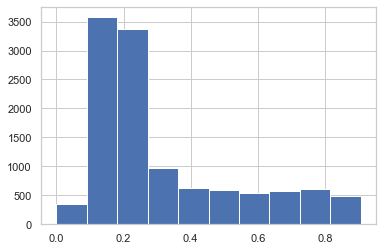

In [77]:
predict_r['SCORE'] = predict_r[['SCORE_x', 'SCORE_y', 'SCORE']].mean(axis=1)
predict_r['SCORE'].hist()

In [78]:
predict_r[['USER_ID','SCORE']].to_csv('lgbm_repeat_stratify_ensamble_1.csv', index=False)

### PREDICT ALL TRIMESTER

In [79]:
pageview.head()

,trimestre,USER_ID,1000_1000,1000_2,1000_40,1000_611,100_2,100_40,102_154,102_2,...,page_950,page_96,page_963,page_97,page_972,page_98,page_980,page_99,page_994,page_997
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,0,0,0,0,0,5,0,...,0,1,0,1,0,1,0,6,0,0


In [85]:
def predict_lgbm_all(grid, X_test_part, users, add='', tipo=''):
    predict_test = grid.best_estimator_.predict_proba(X_test_part)[:,1]
    predict_test = pd.DataFrame(
        {'USER_ID':users, 
         'SCORE':predict_test} 
    )
    #display(predict_test.head())
    print(predict_test[predict_test['SCORE'] < 0.01].shape)
    print(predict_test[predict_test['SCORE'] > 0.5].shape)
    print(predict_test[predict_test['SCORE'] > 0.99].shape)
    
    predict_test.groupby(by=['USER_ID'])['SCORE'].mean().to_csv('lgbm_{}_{}_{}_mean.csv'.format(tipo, grid.best_score_, add), index=True)
    predict_test.groupby(by=['USER_ID'])['SCORE'].median().to_csv('lgbm_{}_{}_{}_median.csv'.format(tipo, grid.best_score_, add), index=True)
    return predict_test

(0, 2)
(8640, 2)
(0, 2)


<AxesSubplot:>

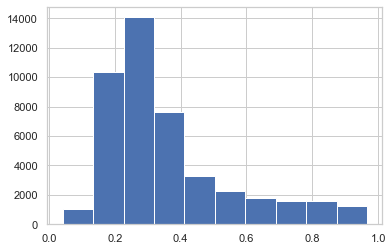

In [86]:
predict_all_1 = predict_lgbm_all(grid_1, pageview[list_var_relevants], pageview['USER_ID'], add='lasso', tipo='time_split')
predict_all_1['SCORE'].hist()

(0, 2)
(8155, 2)
(0, 2)


<AxesSubplot:>

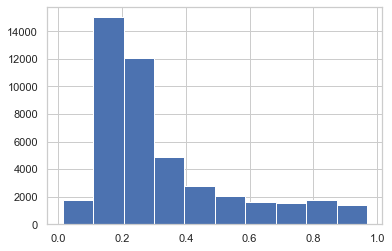

In [87]:
predict_all_2 = predict_lgbm_all(grid_2, pageview[list_var_chi], pageview['USER_ID'], add='chi', tipo='time_split')
predict_all_2['SCORE'].hist()

(0, 2)
(8537, 2)
(0, 2)


<AxesSubplot:>

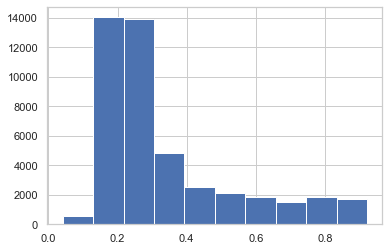

In [88]:
predict_all_3 = predict_lgbm_all(grid_3, pageview[list_var_anova], pageview['USER_ID'], add='anova', tipo='time_split')
predict_all_3['SCORE'].hist()

(3, 2)
(10093, 2)
(0, 2)


<AxesSubplot:>

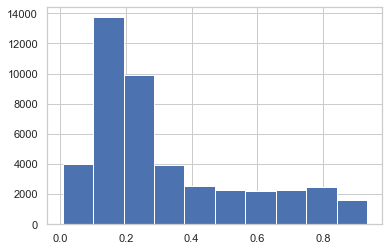

In [89]:
predict_all_1_r = predict_lgbm_all(grid_1_r, pageview[list_var_relevants], pageview['USER_ID'], add='lasso', tipo='repeat_stratify')
predict_all_1_r['SCORE'].hist()

(0, 2)
(9990, 2)
(0, 2)


<AxesSubplot:>

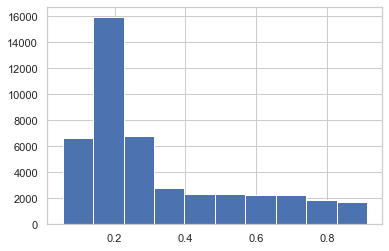

In [90]:
predict_all_2_r = predict_lgbm_all(grid_2_r, pageview[list_var_chi], pageview['USER_ID'], add='chi', tipo='repeat_stratify')
predict_all_2_r['SCORE'].hist()

(0, 2)
(10013, 2)
(0, 2)


<AxesSubplot:>

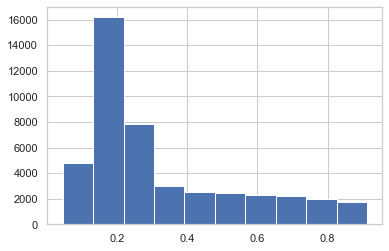

In [91]:
predict_all_3_r = predict_lgbm_all(grid_3_r, pageview[list_var_anova], pageview['USER_ID'], add='anova', tipo='repeat_stratify')
predict_all_3_r['SCORE'].hist()